In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix

from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("./creditcard/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


PREPROCESSING

In [4]:
df.isnull().sum()
# df.fillna(value=df.mean(numeric_only=True), inplace=True)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
print(df['Class'].unique())
'0 is for normal credit card transaction, 1 is for fraudulent credit card transaction'

[0 1]


'0 is for normal credit card transaction, 1 is for fraudulent credit card transaction'

In [6]:
# print("No of records")
# ar = df['Class'].value_counts().unique()
# print(f"{df['Class'].unique()[0]}: {ar[0]}")
# print(f"{df['Class'].unique()[1]}: {ar[1]}")

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<AxesSubplot: ylabel='count'>

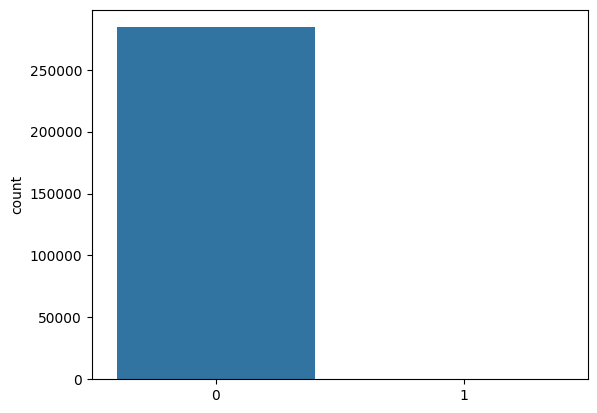

In [8]:
sns.barplot(y=df['Class'].value_counts(), x=df['Class'].unique())
# sns.countplot(x=df['Class'].value_counts())

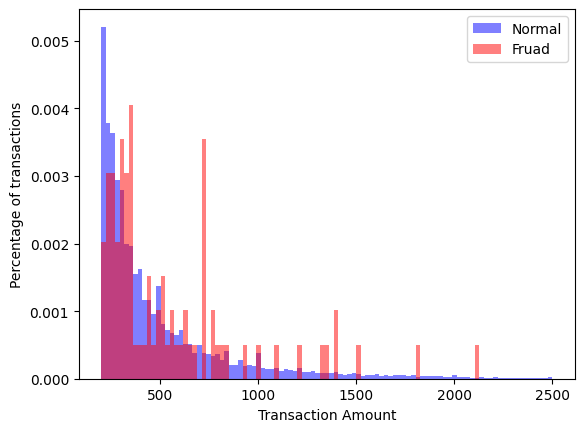

In [9]:
normal_df = df[df['Class']==0]
fruad_df = df[df['Class']==1]

plt.hist(normal_df['Amount'],alpha=0.5,bins=np.linspace(200,2500,100), label='Normal', color='blue', density=True)
plt.hist(fruad_df['Amount'],alpha=0.5,bins=np.linspace(200,2500,100), label='Fruad', color='red', density=True)
plt.legend()
plt.xlabel('Transaction Amount')
plt.ylabel('Percentage of transactions')
plt.show()

In [10]:
# Scaling Time and Amount from the dataset

sc = StandardScaler()
df['Time'] = sc.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


TRAIN TEST SPLIT

In [11]:
x_train, x_test = tts(df, test_size=0.2, random_state=10)

x_train = x_train[x_train['Class']==0]                      # taking only normal transactions
y_train = x_train['Class']
x_train = x_train.drop('Class', axis=1)
y_test = x_test['Class']
x_test = x_test.drop('Class', axis=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(227447, 30)
(227447,)
(56962, 30)
(56962,)


In [12]:
# flattening (taking only numeric data)
x_train = x_train.values
x_test = x_test.values

In [13]:
nb_epochs = 50
batch_size = 64
learning_rate = 1e-7
input_dim = x_train.shape[1]            #num of columns, 30 
encoding_dim = 14
hidden_dim_1 = int(encoding_dim/2)
hidden_dim_2 = 4 

AUTOENCODER

In [ ]:
input_layer = keras.layers.Input(shape=(input_dim, ))

# encoder
encoder = keras.layers.Dense(encoding_dim, activation='tanh', activity_regularizer=keras.regularizers.l2(learning_rate))(input_layer)
encoder = keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
# encoder = keras.layers.Dropout(0.3)(encoder)

# decoder
decoder = keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder = keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = keras.layers.Dense(input_dim, activation='tanh')(decoder)
# decoder = keras.layers.Dropout(0.3)(decoder)

autoencoder = keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dense_4 (Dense)             (None, 14)                112       
                                                                 
 dense_5 (Dense)             (None, 30)                450   

In [15]:
"""Define the callbacks for checkpoints and early stopping"""

cp = keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

In [16]:
autoencoder.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

H = autoencoder.fit(x_train, x_train,
                    epochs=nb_epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, x_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[cp, early_stop]
                )

Epoch 1/50
3551/3554 [============================>.] - ETA: 0s - loss: 0.7716 - accuracy: 0.4210
Epoch 1: val_loss improved from inf to 0.75875, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 15s 4ms/step - loss: 0.7718 - accuracy: 0.4209 - val_loss: 0.7588 - val_accuracy: 0.4479
Epoch 2/50
3551/3554 [============================>.] - ETA: 0s - loss: 0.7003 - accuracy: 0.4429
Epoch 2: val_loss improved from 0.75875 to 0.73075, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 13s 4ms/step - loss: 0.7002 - accuracy: 0.4429 - val_loss: 0.7308 - val_accuracy: 0.4349
Epoch 3/50
3547/3554 [============================>.] - ETA: 0s - loss: 0.6806 - accuracy: 0.4316
Epoch 3: val_loss improved from 0.73075 to 0.71614, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 13s 4ms/step - loss: 0.6808 - accuracy: 0.4316 - val_loss: 0.7161 - val_accuracy: 0.4269
Epoch 4/50
3553/3554 [===================

Text(0.5, 0, 'Epoch')

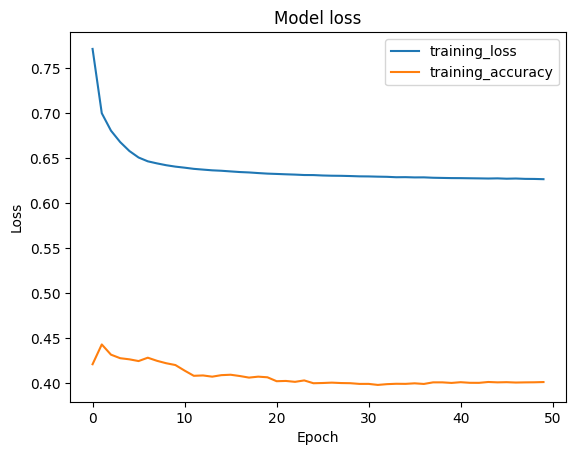

In [17]:
plt.plot(H.history['loss'], label='training_loss')
plt.plot(H.history['accuracy'], label='training_accuracy')
plt.legend()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

EVALUATE MODEL

In [18]:
autoencoder.evaluate(x_test, y_test)

1781/1781 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.0799


[0.2790488004684448, 0.07991292327642441]

PREDICTIONS

In [29]:
y_pred = autoencoder.predict(x_test)
# mse = mean_squared_error(x_test, y_pred)
mse = np.mean(((x_test - y_pred)**2), axis=1)
mse

1781/1781 [==============================] - 2s 1ms/step


array([0.14039413, 0.18745977, 0.71643795, ..., 0.12205497, 0.24204204,
       0.2109798 ])

In [20]:
mse_df = pd.DataFrame({
    "Reconstruction Error": mse,
    "True values": y_test
})
mse_df

,Reconstruction Error,True values
168367,0.140394,0
110270,0.187460,0
243562,0.716438,0
74702,0.580381,0
98416,0.088678,0
...,...,...
201941,0.243336,0
244413,0.347122,0
50907,0.122055,0
240691,0.242042,0


In [21]:
x = y_test.astype(bool)             # Convert to boolean
mse_df = pd.DataFrame({
    "Reconstruction Error": mse,
    "True values": x
})
mse_df

,Reconstruction Error,True values
168367,0.140394,False
110270,0.187460,False
243562,0.716438,False
74702,0.580381,False
98416,0.088678,False
...,...,...
201941,0.243336,False
244413,0.347122,False
50907,0.122055,False
240691,0.242042,False


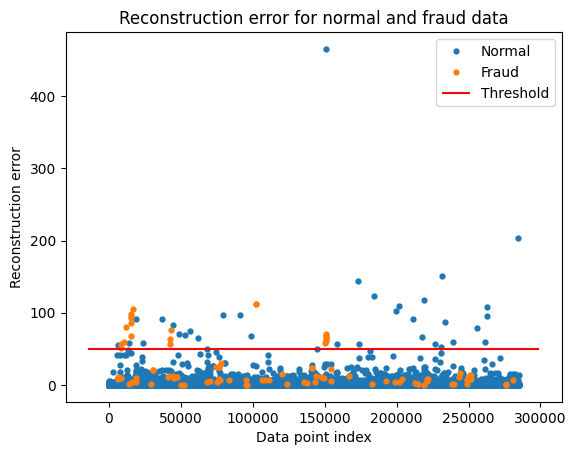

In [41]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize 
#if the threshold value needs to be adjusted.

threshold_fixed = 50
groups = mse_df.groupby('True values')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group["Reconstruction Error"], marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

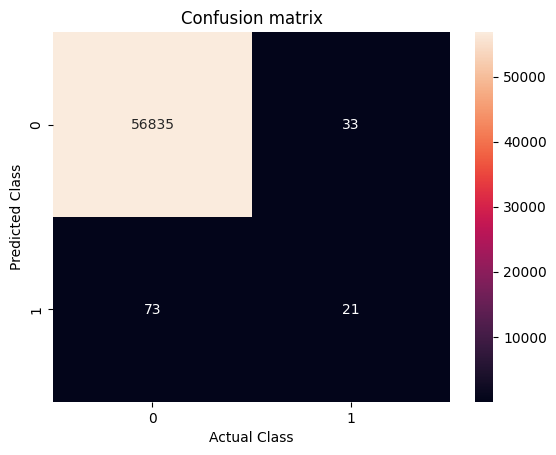

In [34]:
threshold = 52
y_pred_2 = [1 if i>threshold else 0 for i in mse]
conf_mat = confusion_matrix(y_test, y_pred_2) 
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title("Confusion matrix")
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()

In [35]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.39      0.22      0.28        94

    accuracy                           1.00     56962
   macro avg       0.69      0.61      0.64     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
# y_test.shape

In [25]:
# y_pred.shape